# Cal Enviro Screen

## Lets import our library and get data about Cal Enviro Screen

In [7]:
# import libraries
import pandas as pd

# import Cal Enviro Screen Data Set
cal_enviro= pd.read_csv('data/CalEnviro_LA_County.csv')

# check out the basic shape
cal_enviro.shape

(2007, 9)

In [8]:
# Look at the first 10 rows to get a sense of what the data is telling us
cal_enviro.head(10)


,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
0,6019001100,94.09,95-100% (highest scores),99.95,99.70,3174,Fresno,93706,Fresno
1,6071001600,90.68,95-100% (highest scores),100.00,98.11,6133,San Bernardino,91761,Ontario
2,6019000200,85.97,95-100% (highest scores),99.00,99.99,3167,Fresno,93706,Fresno
3,6077000801,82.49,95-100% (highest scores),99.59,97.72,6692,San Joaquin,95203,Stockton
4,6019001500,82.03,95-100% (highest scores),99.99,92.76,2206,Fresno,93725,Fresno
5,6037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
6,6077000300,80.18,95-100% (highest scores),98.07,99.65,2396,San Joaquin,95203,Stockton
7,6019001000,80.13,95-100% (highest scores),97.35,99.91,4106,Fresno,93706,Fresno
8,6037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
9,6019000400,78.53,95-100% (highest scores),99.48,95.71,6343,Fresno,93721,Fresno


In [12]:
# This changes the census tract column to be imported as a string
cal_enviro['Census Tract'] = cal_enviro['Census Tract'].astype(str)

# And now we add the zero at the begining
cal_enviro['Census Tract'] = cal_enviro['Census Tract'].str.zfill(11)

# Let's take a look to check that it worked
cal_enviro.head()

,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
0,06019001100,94.09,95-100% (highest scores),99.95,99.70,3174,Fresno,93706,Fresno
1,06071001600,90.68,95-100% (highest scores),100.00,98.11,6133,San Bernardino,91761,Ontario
2,06019000200,85.97,95-100% (highest scores),99.00,99.99,3167,Fresno,93706,Fresno
3,06077000801,82.49,95-100% (highest scores),99.59,97.72,6692,San Joaquin,95203,Stockton
4,06019001500,82.03,95-100% (highest scores),99.99,92.76,2206,Fresno,93725,Fresno


## Let's do a little bit of cleaning

Only look at the Los Angeles data and also rename the columns so it's easier for us to read

In [13]:
# Now we want to just simplify the data to only look at Los Angeles
enviro_LA= cal_enviro[cal_enviro['California County']== 'Los Angeles']

# Let's look at the head to make sure it worked.
enviro_LA.head()

,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
5,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
8,06037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
14,06037205120,78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
16,06037291220,77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
20,06037239202,76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles


In [37]:
# Let's rename a few of these columns to get the weird \n out of there.
enviro_LA=enviro_LA.rename(columns={"CalEnviroScreen\n3.0 Score": "Score", 
                          "CalEnviroScreen 3.0 \nPercentile Range": "Percentile Range",
                          "Pollution Burden\nPercentile" : "Burden Percentile",
                          "Population Characteristics\nPercentile" : "Characteristcs Percentile",
                          "Total Population" : "Population",
                          "Nearby City \n(to help approximate location only)" : "Nearby City"
                         })

#check out the renamed columns
enviro_LA.head(10)

,Census Tract,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
5,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
8,06037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
14,06037205120,78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
16,06037291220,77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
20,06037239202,76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles
21,06037226002,76.04,95-100% (highest scores),99.83,90.38,1604,Los Angeles,90021,Los Angeles
27,06037535400,74.46,95-100% (highest scores),97.41,97.96,3495,Los Angeles,90002,Los Angeles
31,06037243100,73.54,95-100% (highest scores),94.35,99.68,5350,Los Angeles,90059,Los Angeles
32,06037543305,73.54,95-100% (highest scores),99.76,88.26,2666,Los Angeles,90220,Compton
34,06037204600,73.13,95-100% (highest scores),98.53,94.83,4101,Los Angeles,90023,Los Angeles


## Charts

Now let's make some basic bar charts.

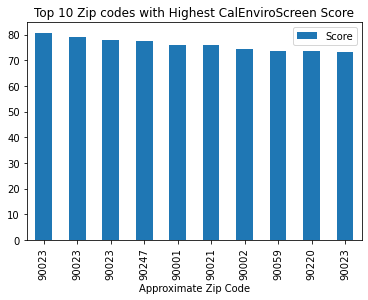

In [16]:
# Let's plot the top 10 using our regular basic bar chart
enviro_LA.head(10).plot.bar(x='Approximate Zip Code',
                            y='Score', 
                            title='Top 10 Zip codes with Highest CalEnviroScreen Score')

Ok that first one is pretty nice but it's not very pretty. And we also have a few duplicate zip codes in there.

In [57]:
# Now let's try a fancier looking chart using plotly. First we need to import plotly.
import plotly.express as px

In [63]:
# now make a plot of the same data as we had before
px.bar(enviro_LA[enviro_LA['Score']>73.13],
    x='Approximate Zip Code',
    y='Score', #changed to score
    title='Score by Zip Code')

Ok this makes a weird looking chart because the zip codes are coming in as numbers instead of actual categories. We need to change them to be categorical somehow. It's also weird because it's stacking scores on top of each zip code so I don't think we want to use Zipcode on the X axis. Let's try it with a unique id, which would be the census tract

In [64]:
# Create a figure from the Enviro LA data frame where the score is greater than 73.12 (the top 10)
fig = px.bar(enviro_LA.head(20), 
            x='Census Tract', 
            y='Score', 
            hover_data=['Score'], 
            color='Score', 
            height=500,
            title='Top 20 census tracts with the highest Cal Enviro Screen Scores'
            )

# force the chart to show the census tract as a category <--- THIS IS THE MAGIC TRICK THAT MAKES IT WORK
fig.update_layout(xaxis=dict(type='category'))

fig.show()

Great! What a pretty little rainbow of a chart.

# Maps

## Basic census tracts map
Time to make some maps! We'll start by importing the geopandas library and the LA census tracts from the LA Times

In [66]:
# Import geopandas so we can analyze geographic data
import geopandas as gdp

# Bring in the LA census tracts 
tracts= gdp.read_file('data/census-tracts-2012.geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [67]:
#let's simplify it to just the columns we need
tracts_trimmed = tracts[['name','geometry']]
tracts_trimmed.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [68]:
# rename the columns
tracts_trimmed.columns = ['Census Tract','geometry']
tracts_trimmed.head()

,Census Tract,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


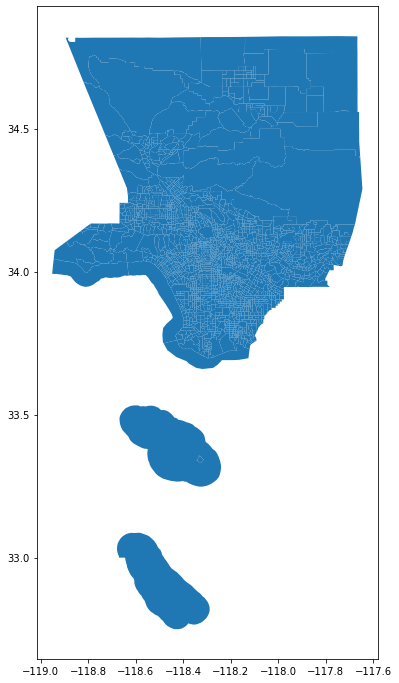

In [70]:
# Look at our map!
tracts_trimmed.plot(figsize=(12,12))

## Merging Census Tracts and Cal Enviro Screen Data

Now we want to put our Cal Enviroscreen data on top of this map

In [75]:
# create a new dataframe based on the join
combined_enviro_tracts=tracts_trimmed.merge(enviro_LA,on="Census Tract")

# show me the first 5 to make sure it worked
combined_enviro_tracts.head()

,Census Tract,geometry,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
0,06037104103,"MULTIPOLYGON (((-118.40085 34.28159, -118.3952...",45.29,80-85%,73.07,80.78,4085,Los Angeles,91342,Sylmar
1,06037104108,"MULTIPOLYGON (((-118.40853 34.27071, -118.3976...",43.88,80-85%,78.44,73.25,5256,Los Angeles,91331,Pacoima
2,06037104203,"MULTIPOLYGON (((-118.41799 34.27964, -118.4114...",40.88,75-80%,55.15,84.56,5210,Los Angeles,91331,Pacoima
3,06037104204,"MULTIPOLYGON (((-118.41142 34.28443, -118.4074...",40.03,75-80%,79.50,63.83,3375,Los Angeles,91342,Sylmar
4,06037104310,"MULTIPOLYGON (((-118.44011 34.26727, -118.4357...",59.68,95-100% (highest scores),96.63,81.31,4921,Los Angeles,91331,Pacoima


In [77]:
# Get some basis stats
combined_enviro_tracts['Score'].describe()

count    1021.000000
mean       51.772595
std         8.178682
min        39.340000
25%        45.180000
50%        50.920000
75%        57.240000
max        80.730000
Name: Score, dtype: float64

Looks like the score ranges from about 39.3-80.7, with an average score of about 52

In [78]:
# Now let's sort the data
combined_sorted = combined_enviro_tracts.sort_values(by='Score',ascending = False)

# Take a look at it
combined_sorted.head()

,Census Tract,geometry,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
221,06037204920,"MULTIPOLYGON (((-118.20281 34.01401, -118.2028...",80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
227,06037206050,"MULTIPOLYGON (((-118.22278 34.01525, -118.2271...",79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
223,06037205120,"MULTIPOLYGON (((-118.21993 34.01510, -118.2202...",78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
458,06037291220,"MULTIPOLYGON (((-118.29090 33.87287, -118.2912...",77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
409,06037239202,"MULTIPOLYGON (((-118.27393 33.98333, -118.2739...",76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles


## Plot the combined data

Now we want to see how this looks on a map!

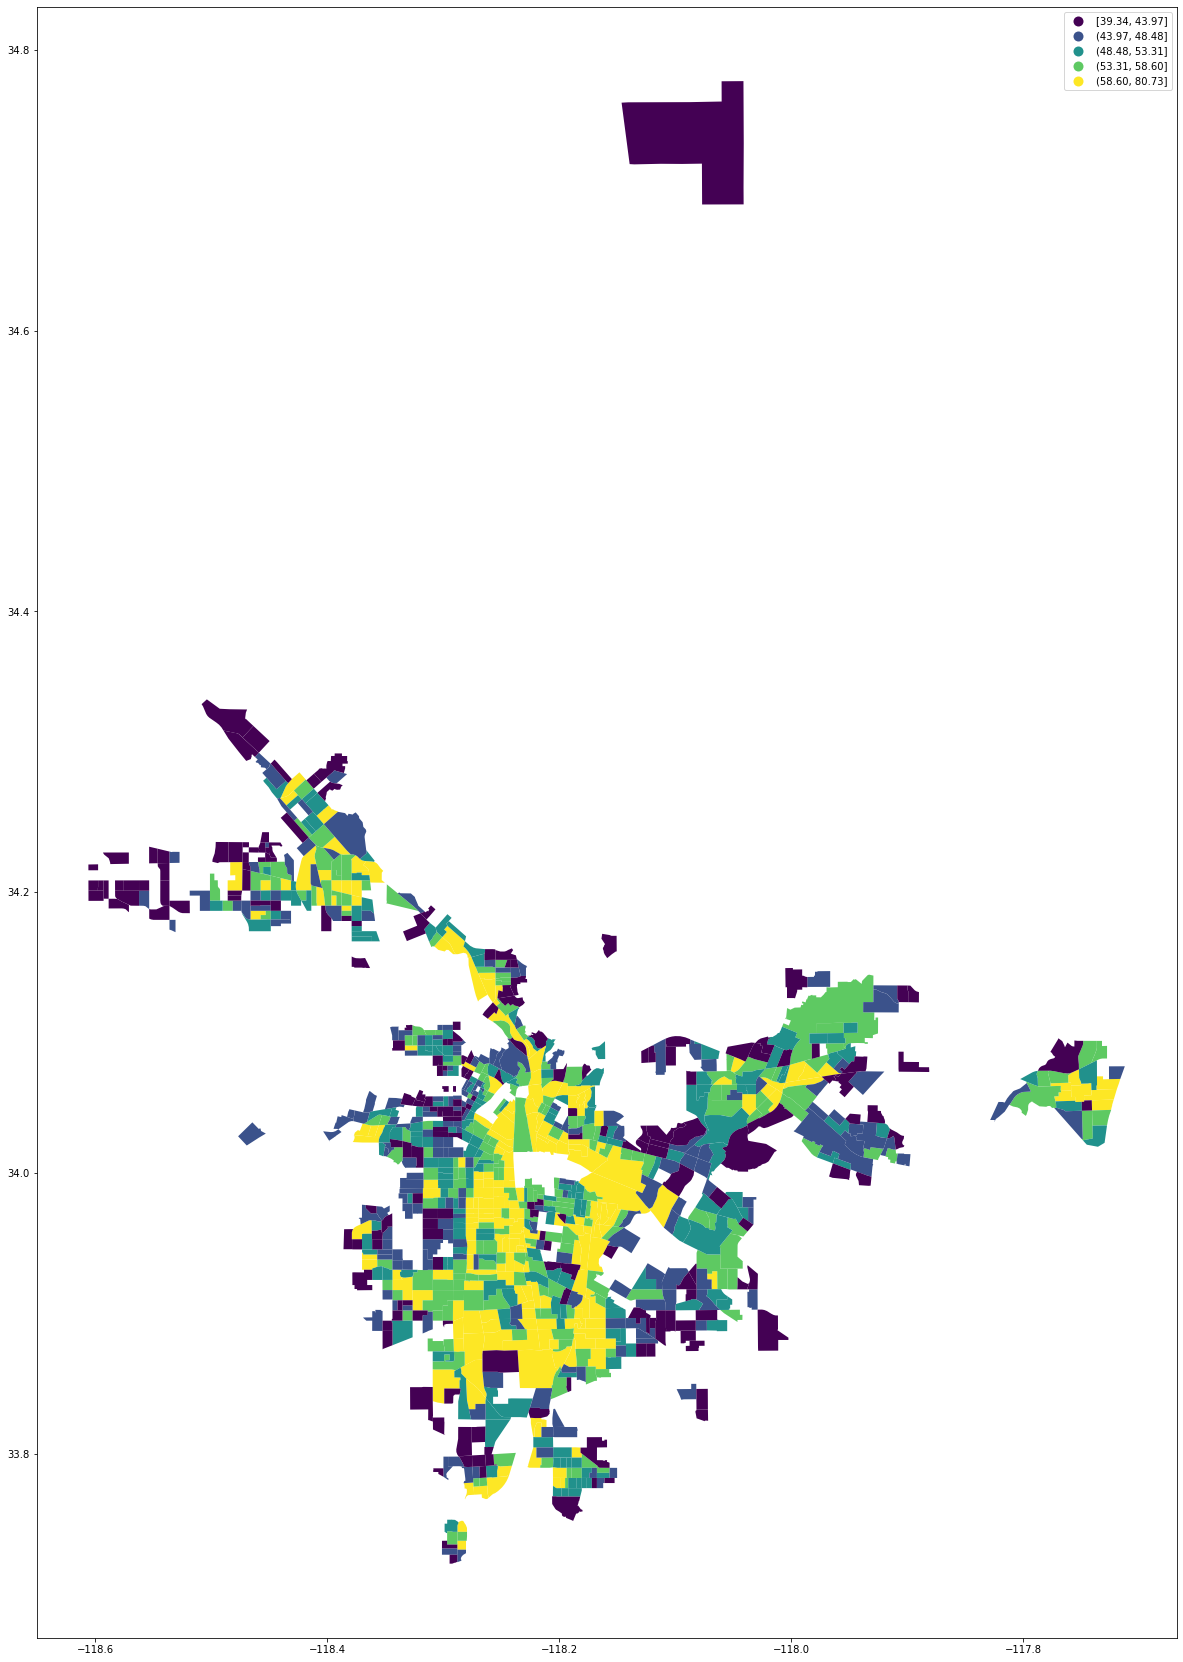

In [84]:
# plot it with quantiles
combined_sorted.plot(figsize=(30,30),
                 column='Score', #Changed this to score to keep it consistent with what we have above
                 legend=True,
                 scheme='quantiles')

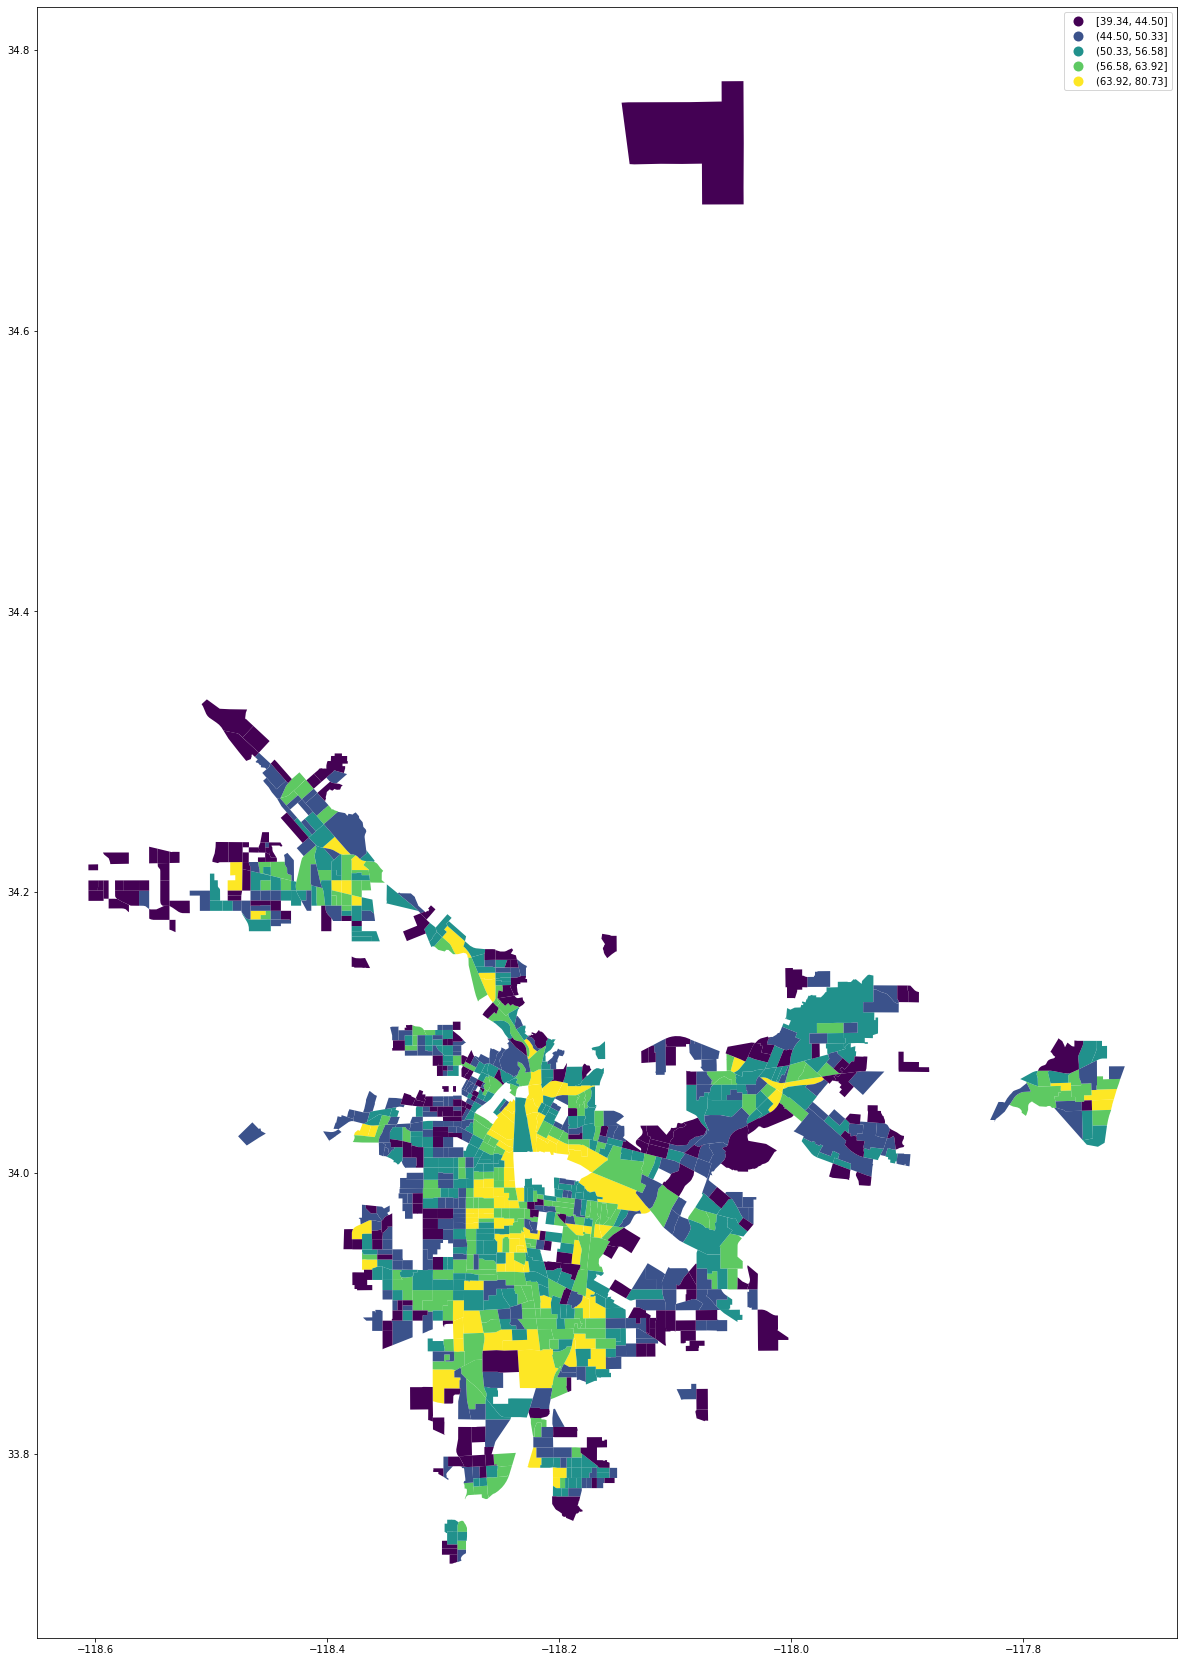

In [85]:
# plot it, this time with natural breaks
combined_sorted.plot(figsize=(30,30),
                 column='Score', # Changed this to score to keep it consistent with what we have above
                 legend=True,
                 scheme='naturalbreaks')

## Adding a basemap

This looks cool but it would be nice to have a map under the data so we can tell where it is. Let's add a basemap now

In [87]:
# import Contextilly to for basemaps
import contextily as ctx

# reproject to web mercator, I still don't quite understand why
combined_sorted = combined_sorted.to_crs(epsg=3857)

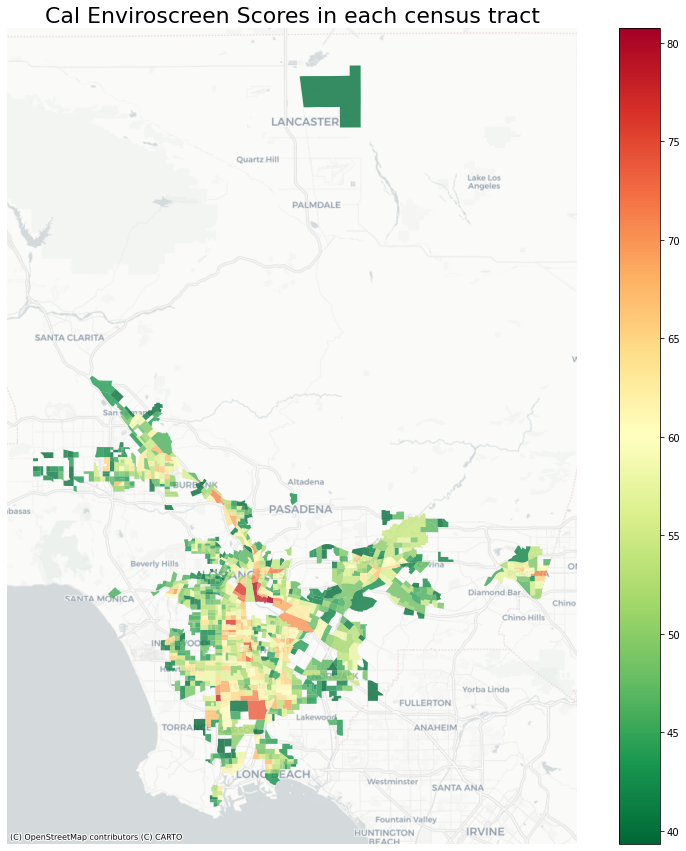

In [89]:
ax = combined_sorted.plot(figsize=(15,15),
                        column='Score',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Cal Enviroscreen Scores in each census tract',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# YAY and now we have this data on a map!